In [11]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import BatchNormalization, Dropout
import matplotlib.pyplot as plt

In [12]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [13]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(x_train)

In [25]:
# Learning Rate Scheduler
def lr_schedule(epoch):
    return 0.001 * (0.1 ** int(epoch / 1))

lr_callback = LearningRateScheduler(lr_schedule)

In [26]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [27]:
# Define the model architecture with Batch Normalization
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10)
])

In [28]:
# Dropout for Regularization
model.add(Dropout(0.25))

In [29]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [30]:
# Train the model with Data Augmentation and Learning Rate Scheduler
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=10),
    epochs=5,
    validation_data=(x_test, y_test),
    callbacks=[lr_callback]
)

Epoch 1/5
5000/5000 [==============================] - 144s 28ms/step - loss: 1.8241 - accuracy: 0.1111 - val_loss: 1.4789 - val_accuracy: 0.0981 - lr: 0.0010
Epoch 2/5
5000/5000 [==============================] - 140s 28ms/step - loss: 1.5300 - accuracy: 0.1135 - val_loss: 1.1448 - val_accuracy: 0.0919 - lr: 1.0000e-04
Epoch 3/5
5000/5000 [==============================] - 142s 28ms/step - loss: 1.4796 - accuracy: 0.1146 - val_loss: 1.0955 - val_accuracy: 0.1059 - lr: 1.0000e-05
Epoch 4/5
5000/5000 [==============================] - 143s 29ms/step - loss: 1.4734 - accuracy: 0.1158 - val_loss: 1.0902 - val_accuracy: 0.1040 - lr: 1.0000e-06
Epoch 5/5
5000/5000 [==============================] - 144s 29ms/step - loss: 1.4765 - accuracy: 0.1148 - val_loss: 1.0902 - val_accuracy: 0.1048 - lr: 1.0000e-07


In [31]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

313/313 - 4s - loss: 1.0902 - accuracy: 0.1048 - 4s/epoch - 13ms/step
Test accuracy: 0.10480000078678131


In [32]:
# Save the model
model.save("cifar10_image_classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


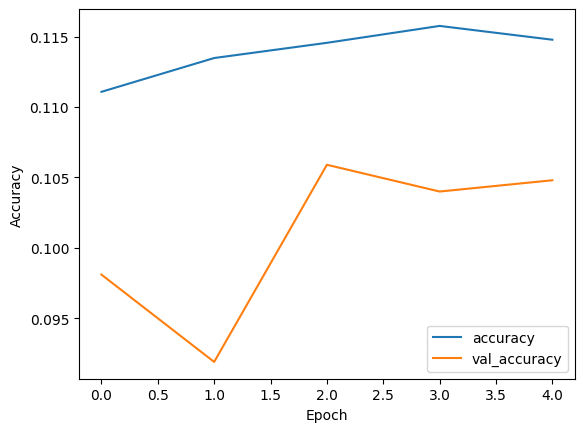

In [33]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()